# Análise do Portfolio de Fundos

### Inicializações

In [1]:
import pandas as pd
import numpy as np

from datetime import datetime,timedelta
import math
import matplotlib.pyplot as plt
import seaborn as sn
sn.set_style("whitegrid")


In [2]:
#Get the Exchange Rates
exchange_rates_csv = 'exchange_rates.csv'
exchange_rates = pd.read_csv(exchange_rates_csv ,sep=';',parse_dates=[0])
exchange_rates['Date'] = exchange_rates['Date'].apply(lambda x: x.date())
exchange_rates = exchange_rates.set_index('Date')
exchange_rates.head()

,USD2EUR
Date,
2023-09-08,0.93398
2023-09-07,0.93458
2023-09-06,0.93225
2023-09-05,0.93229
2023-09-04,0.92635


In [3]:
#Get the Portofolio
portfolio_csv = 'portofolio.csv'
df_portofolio = pd.read_csv(portfolio_csv ,sep=';').set_index('Code')
code2name_dict = {x[0]:x[1] for x in df_portofolio.itertuples()}
df_portofolio.sort_values(by="Nome", axis=0)

,Nome,Moeda,Quantidade
Code,,,
LU0524465977,Alken European Opport A,EUR,26.86495
LU1997245177,Allianz China A Shares AT USD,USD,257.82900
LU1883314244,Amundi Europ Value A C,EUR,24.05600
LU0628613639,BGF World Resources E2,EUR,1251.44000
LU0108459040,Candriam Biotech C Cap USD,USD,3.60500
LU1278917452,DWS CROCI Sect Plus LC,EUR,40.95800
LU1769942746,DWS CROCI US Divid,USD,8.51300
LU0740823439,DWS Invest German Equities,EUR,5.19500
LU0300742037,F Natural Rosources N,EUR,729.92700


In [4]:
#Get the historical quotes 

xls = 'historico_cotacoes.xlsx'
dict_df = pd.read_excel(xls,sheet_name=None)

# Parse the date and set it as index
for key in dict_df.keys():
    dict_df[key]['Date'] = dict_df[key].apply(lambda x: pd.to_datetime(x['Date'], infer_datetime_format = True).date(), axis=1)
    dict_df[key].set_index('Date',drop=True, inplace=True)

# Create the DataFrame from the Dictionary of Dataframes, removing rows with null values
df_all = pd.concat([dict_df[f_name][['Close']].rename(columns={'Close':f_name}) for f_name in dict_df.keys()],axis=1).sort_index(ascending=False)
df_all.head()

,LU0094557526,LU0248173006,PTSQUGHM0007,LU0384381660,LU1769942746,LU0108459040,LU1670715975,IE00BLP5S460,LU0269905138,LU0524465977,...,LU0159053015,LU0213962813,LU0266117414,LU0300742037,LU0332193340,LU0425092995,LU0985320646,LU1278917452,LU1670718219,LU2295319565
Date,,,,,,,,,,,,,,,,,,,,,
2023-09-08,45.74,37.47,NaN,63.52,317.66,NaN,45.00,1.44,16.26,NaN,...,64.02,50.47,78.53,6.87,1006.97,28.45,172.03,239.43,10.72,14.14
2023-09-07,45.63,37.57,NaN,63.03,315.69,758.71,45.57,1.44,16.28,239.29,...,63.37,50.15,77.08,6.83,999.44,28.71,171.82,240.18,10.71,13.93
2023-09-06,45.69,37.95,NaN,63.09,317.87,759.27,45.66,1.44,16.50,240.93,...,64.81,49.22,79.34,6.86,998.76,28.75,172.42,244.15,10.71,14.30
2023-09-05,46.02,38.20,NaN,63.80,321.02,762.69,45.55,1.43,16.69,242.62,...,63.93,49.61,78.28,6.89,999.89,28.61,173.25,243.86,10.71,14.09
2023-09-04,NaN,38.30,NaN,64.21,NaN,NaN,45.46,1.43,16.86,242.55,...,NaN,48.74,78.62,6.85,NaN,28.57,NaN,NaN,10.72,14.07


In [5]:
#Create a DataFrame starting from the furthest Date where all Funds have a valid amount, and replace a NaN with the last value known
df = df_all.loc[:df_all.dropna().index.min()].fillna(method='bfill')

#Create a DataFrame with the daily growth
df_grow = df.apply(lambda x: x/x.shift(-1), axis=0)
df

,LU0094557526,LU0248173006,PTSQUGHM0007,LU0384381660,LU1769942746,LU0108459040,LU1670715975,IE00BLP5S460,LU0269905138,LU0524465977,...,LU0159053015,LU0213962813,LU0266117414,LU0300742037,LU0332193340,LU0425092995,LU0985320646,LU1278917452,LU1670718219,LU2295319565
Date,,,,,,,,,,,,,,,,,,,,,
2023-09-08,45.74,37.47,11.08,63.52,317.66,758.71,45.00,1.44,16.26,239.29,...,64.02,50.47,78.53,6.87,1006.97,28.45,172.03,239.43,10.72,14.14
2023-09-07,45.63,37.57,11.08,63.03,315.69,758.71,45.57,1.44,16.28,239.29,...,63.37,50.15,77.08,6.83,999.44,28.71,171.82,240.18,10.71,13.93
2023-09-06,45.69,37.95,11.08,63.09,317.87,759.27,45.66,1.44,16.50,240.93,...,64.81,49.22,79.34,6.86,998.76,28.75,172.42,244.15,10.71,14.30
2023-09-05,46.02,38.20,11.08,63.80,321.02,762.69,45.55,1.43,16.69,242.62,...,63.93,49.61,78.28,6.89,999.89,28.61,173.25,243.86,10.71,14.09
2023-09-04,46.32,38.30,11.08,64.21,321.67,771.34,45.46,1.43,16.86,242.55,...,63.81,48.74,78.62,6.85,986.27,28.57,173.17,240.39,10.72,14.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-08,46.17,41.26,10.97,68.78,325.91,771.06,42.67,1.37,17.26,253.40,...,52.31,34.06,75.18,6.78,954.16,28.41,171.78,238.23,10.60,13.33
2023-02-07,46.08,41.20,10.97,68.07,322.38,787.53,42.45,1.37,17.12,252.97,...,51.14,34.06,72.27,6.81,956.08,28.04,170.39,236.15,10.59,12.87
2023-02-06,45.87,40.90,10.97,68.18,323.29,785.45,41.87,1.38,17.13,252.86,...,51.38,37.25,74.20,6.65,924.12,27.78,170.37,233.62,10.60,13.13


In [6]:
# Calculate the Portofolio Std and Growth
df_portofolio['STD'] = df_grow.std(axis=0)
df_portofolio['Growth'] = df.apply(lambda x: x[0]/x[-1]-1)
df_portofolio['Racio'] = df_portofolio['Growth']/df_portofolio['STD']

In [7]:
# Get the Current Total Amount in EUR

last_date = min(df.index[0],exchange_rates.index[0])
# Get the exchange rate for the last date of the historical quotes
usd2eur = exchange_rates.loc[last_date][0]
# Get the last Quotes
quotes = df_all.fillna(method='bfill').iloc[0]

df_portofolio['Amount EUR'] = df_portofolio['Moeda'].apply(lambda x: usd2eur if x == 'USD' else 1) * quotes * df_portofolio['Quantidade']

sum(df_portofolio['Amount EUR'])

251527.70584525366

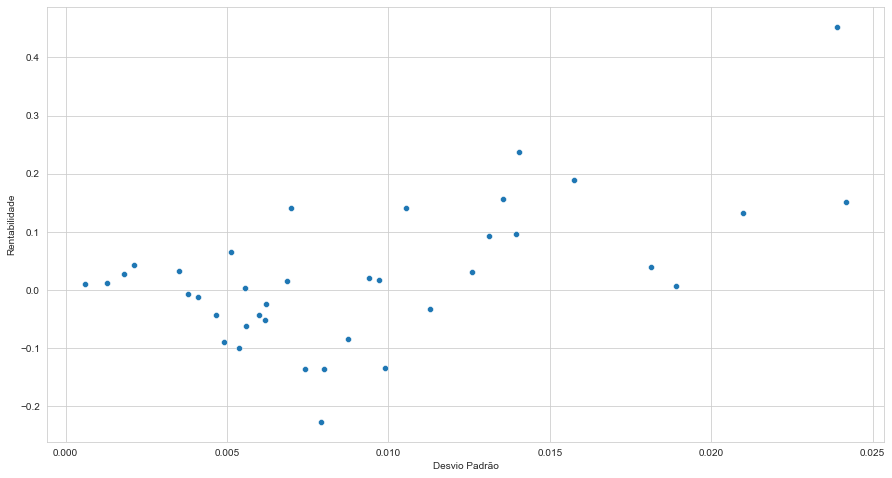

In [8]:
plt.figure(figsize=(15,8))
plt.xlabel('Desvio Padrão')
plt.ylabel('Rentabilidade')
p = sn.scatterplot(x=df_portofolio['STD'],y=df_portofolio['Growth'])

In [9]:
df_portofolio.sort_values(by=['Nome'],ascending=True)

,Nome,Moeda,Quantidade,STD,Growth,Racio,Amount EUR
Code,,,,,,,
LU0524465977,Alken European Opport A,EUR,26.86495,0.005590,-0.061939,-11.079486,6428.513885
LU1997245177,Allianz China A Shares AT USD,USD,257.82900,0.007925,-0.227273,-28.679437,2497.169932
LU1883314244,Amundi Europ Value A C,EUR,24.05600,0.004085,-0.011566,-2.831338,3494.855680
LU0628613639,BGF World Resources E2,EUR,1251.44000,0.006186,-0.051839,-8.380697,14191.329600
LU0108459040,Candriam Biotech C Cap USD,USD,3.60500,0.005987,-0.043940,-7.339032,2554.574977
LU1278917452,DWS CROCI Sect Plus LC,EUR,40.95800,0.009697,0.017768,1.832333,9806.573940
LU1769942746,DWS CROCI US Divid,USD,8.51300,0.006209,-0.024625,-3.966377,2525.705683
LU0740823439,DWS Invest German Equities,EUR,5.19500,0.004667,-0.043660,-9.354735,985.439550
LU0300742037,F Natural Rosources N,EUR,729.92700,0.012578,0.031532,2.506826,5014.598490


In [10]:
df_portofolio['Amount EUR'].sum()

251527.7058452536

In [11]:
df_portofolio = df_portofolio[df_portofolio.index != "LU0122613903"]

<Figure size 1080x576 with 0 Axes>

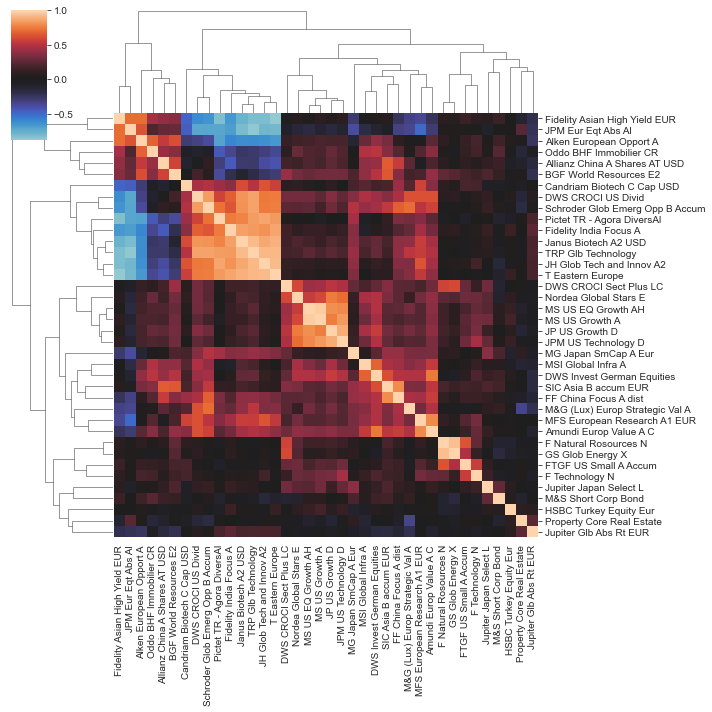

In [12]:
plt.figure(figsize=(15,8))
sn.clustermap(df_grow.rename(columns=code2name_dict).corr(),center=0)
#df_grow.corr()

In [39]:
##### Performance in the last days
df_portofolio_tmp = df_portofolio.copy()
start =5
finish = 0
print('Start Date:',df_all.index[start])
df_portofolio_tmp['Growth'] = df_all.fillna(method='bfill').fillna(method='pad').apply(lambda x: x[finish]/x[start]-1)
df_portofolio_tmp['Racio'] = df_portofolio_tmp['Growth']/df_portofolio_tmp['STD']
# Save Portfoloio
df_portofolio_tmp.sort_values(by=['Racio'],ascending=False).to_csv("portfolio_data.csv",sep=",")
# Show Portfolio
df_portofolio_tmp.sort_values(by=['Growth'],ascending=False)

Start Date: 2023-09-01


,Nome,Moeda,Quantidade,STD,Growth,Racio,Amount EUR
Code,,,,,,,
LU0213962813,HSBC Turkey Equity Eur,EUR,100.79200,0.023904,0.043415,1.816269,5086.972240
LU0286668966,Fidelity Asian High Yield EUR,EUR,247.20000,0.009894,0.023224,2.347330,3703.056000
LU0197230542,Fidelity India Focus A,EUR,26.76000,0.006991,0.021872,3.128633,2100.392400
LU0332193340,GS Glob Energy X,EUR,4.99900,0.013102,0.020988,1.601884,5033.843030
LU1176912761,JPM Eur Eqt Abs Al,EUR,28.07800,0.003517,0.013954,3.967953,3223.635180
LU2295319565,MS US Growth A,EUR,710.73200,0.018143,0.007840,0.432148,10049.750480
IE00BLP5S460,Jupiter Glb Abs Rt EUR,EUR,5007.51100,0.002131,0.006993,3.281561,7210.815840
LU1229532624,Pictet TR - Agora DiversAl,EUR,29.37150,0.001810,0.005548,3.064854,3087.825795
LU0159053015,JPM US Technology D,EUR,156.42100,0.014054,0.003291,0.234165,10014.072420


In [46]:
##### Performance in the last days
df_portofolio_tmp = df_portofolio.copy()
start =10
finish = 0
print('Start Date:',df_all.index[start])
df_portofolio_tmp['Growth'] = df_all.fillna(method='bfill').fillna(method='pad').apply(lambda x: x[finish]/x[start]-1)
df_portofolio_tmp['Racio'] = df_portofolio_tmp['Growth']/df_portofolio_tmp['STD']
# Save Portfoloio
df_portofolio_tmp.sort_values(by=['Racio'],ascending=False).to_csv("portfolio_data.csv",sep=",")
# Show Portfolio
df_portofolio_tmp.sort_values(by=['Nome'],ascending=True)

Start Date: 2023-08-25


,Nome,Moeda,Quantidade,STD,Growth,Racio,Amount EUR
Code,,,,,,,
LU0524465977,Alken European Opport A,EUR,26.86495,0.005590,0.002388,0.427112,6428.513885
LU1997245177,Allianz China A Shares AT USD,USD,257.82900,0.007925,0.008755,1.104772,2497.169932
LU1883314244,Amundi Europ Value A C,EUR,24.05600,0.004085,0.008679,2.124507,3494.855680
LU0628613639,BGF World Resources E2,EUR,1251.44000,0.006186,0.035616,5.757979,14191.329600
LU0108459040,Candriam Biotech C Cap USD,USD,3.60500,0.005987,-0.001132,-0.189107,2554.574977
LU1278917452,DWS CROCI Sect Plus LC,EUR,40.95800,0.009697,0.039148,4.037039,9806.573940
LU1769942746,DWS CROCI US Divid,USD,8.51300,0.006209,0.003951,0.636313,2525.705683
LU0740823439,DWS Invest German Equities,EUR,5.19500,0.004667,0.000158,0.033892,985.439550
LU0300742037,F Natural Rosources N,EUR,729.92700,0.012578,0.045662,3.630238,5014.598490


Start Date: 2023-08-25


<AxesSubplot:xlabel='Date'>

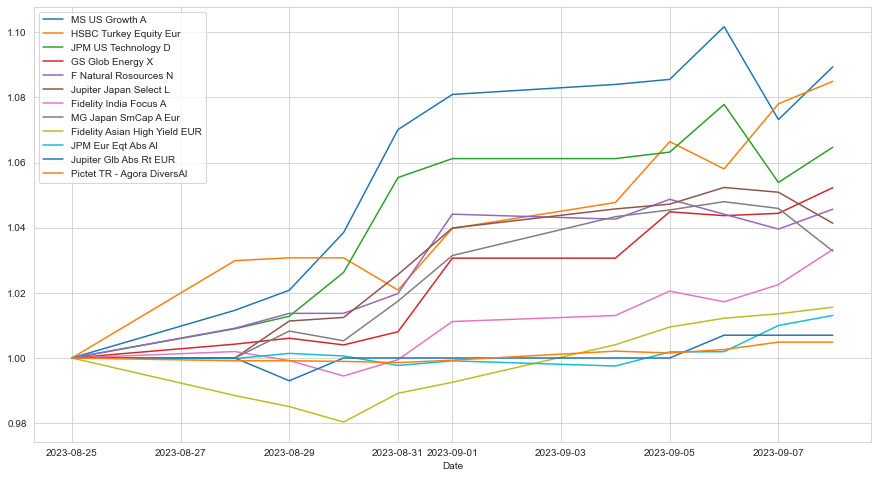

In [44]:
# Select Funds
fund_filter = df_all.columns
fund_filter = ['LU0213962813',

'LU0286668966',

'LU0197230542',

'LU0332193340',

'LU1176912761',

'LU2295319565',

'IE00BLP5S460',

'LU1229532624',

'LU0159053015',

'LU0300742037',

'LU0425092995',

'LU1670715975'


]

print('Start Date:',df_all.index[start])
df_all_tmp = df_all.fillna(method='bfill').fillna(method='pad').apply(lambda x: x/x[start], axis=0)[fund_filter]
df_all_tmp = df_all_tmp.sort_values(by=df_all_tmp.index[finish],axis=1,ascending=False).rename(columns=code2name_dict)
ax = df_all_tmp.iloc[finish:start+1].plot(figsize=(15,8),grid=True)
ax.legend(loc='upper left')
ax

In [ ]:

print('Start Date:',df_all.index[start])
df_all_tmp = df_all.fillna(method='bfill').fillna(method='pad').apply(lambda x: x/x[start], axis=0)
df_all_tmp = df_all_tmp.sort_values(by=df_all_tmp.index[finish],axis=1,ascending=False).rename(columns=code2name_dict)
ax = df_all_tmp.iloc[finish:start+1].plot(figsize=(15,8),grid=True)
ax.legend(loc='upper left')
ax

In [15]:
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage
from pypfopt.efficient_frontier import EfficientFrontier

if 'LU0122613903' in dict_df:
    del dict_df['LU0122613903']

# Create the DataFrame from the Dictionary of Dataframes, removing rows with null values
df_all = pd.concat([dict_df[f_name][['Close']].rename(columns={'Close':f_name}) for f_name in dict_df.keys()],axis=1).sort_index(ascending=False)
df = df_all #.dropna()

# print(df.index)

mu = mean_historical_return(df.sort_index())
S = CovarianceShrinkage(df).ledoit_wolf()
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
df_mu = pd.DataFrame(data = {'Name':df_portofolio['Nome'],'all':list(mu)}, index=list(mu.keys()))
df_w = pd.DataFrame(data = {'Name':df_portofolio['Nome'] ,'all':list(cleaned_weights.values())}, index=list(cleaned_weights.keys()))
df_pp = pd.DataFrame(data = {'all':list(ef.portfolio_performance())}, index=list(['anual return','volatility','sharpe ratio']))
mu_coef = {'all':0.3,90:0.3,5:0.15,10:0.15,30:0.10}
mu_w = mu_coef['all']*mu
for n in mu_coef.keys()-['all']:
    mu = mean_historical_return(df[:n].sort_index())
    
    ef = EfficientFrontier(mu, S)
    weights = ef.max_sharpe()
    cleaned_weights = ef.clean_weights()
    if n == 60:
        mu_w += 0.30*mu
    else:
        mu_w += 0.175*mu
    df_mu[n] = list(mu)
    df_w[n] = list(cleaned_weights.values())
    df_pp[n] = list(ef.portfolio_performance())
    

ef = EfficientFrontier(mu_w, S)
weights = ef.max_sharpe()

df_w['Avg'] = list(ef.clean_weights().values())
df_w['Now'] = df_portofolio_tmp['Amount EUR']/df_portofolio_tmp['Amount EUR'].sum()
df_pp['Avg'] = list(ef.portfolio_performance())
df_mu['Avg'] = list(mu_w)
df_mu.sort_values(by="Avg",ascending=False)

,Name,all,5,10,90,30,Avg
LU0213962813,HSBC Turkey Equity Eur,0.741529,8.001401,3.295362e+00,1.872178,4.263246,3.273092
LU2295319565,MS US Growth A,-0.022853,0.367051,6.314452e+00,0.580238,-0.369199,1.199339
LU0197230542,Fidelity India Focus A,0.028578,2.484652,1.368280e+00,0.771812,0.771812,0.952971
LU0332193340,GS Glob Energy X,0.077098,0.808847,2.698976e+00,0.569311,0.783613,0.873760
LU0159053015,JPM US Technology D,0.161753,0.125437,3.503673e+00,1.027215,-0.028056,0.858473
LU0266117414,MS US EQ Growth AH,0.009128,-0.069618,4.847338e+00,0.441231,-0.519942,0.825065
LU1176912761,JPM Eur Eqt Abs Al,0.053643,1.646528,4.451781e-01,0.401383,0.401383,0.522626
LU0300742037,F Natural Rosources N,0.076293,0.201624,1.706511e+00,0.387249,0.180583,0.456182
LU0140363697,F Technology N,0.112412,-0.237879,2.004757e+00,0.756501,-0.122291,0.453914
LU0286668966,Fidelity Asian High Yield EUR,-0.143535,1.052464,1.133635e+00,0.020413,0.020413,0.346651


In [33]:
df_mu.sort_values(by=5,ascending=False)

,Name,all,5,10,90,30,Avg
LU0213962813,HSBC Turkey Equity Eur,0.741529,8.001401,3.295362e+00,1.872178,4.263246,3.273092
LU0197230542,Fidelity India Focus A,0.028578,2.484652,1.368280e+00,0.771812,0.771812,0.952971
LU1176912761,JPM Eur Eqt Abs Al,0.053643,1.646528,4.451781e-01,0.401383,0.401383,0.522626
LU0286668966,Fidelity Asian High Yield EUR,-0.143535,1.052464,1.133635e+00,0.020413,0.020413,0.346651
LU0332193340,GS Glob Energy X,0.077098,0.808847,2.698976e+00,0.569311,0.783613,0.873760
IE00BLP5S460,Jupiter Glb Abs Rt EUR,0.085903,0.551196,5.535873e-01,0.236418,0.236418,0.301854
LU2295319565,MS US Growth A,-0.022853,0.367051,6.314452e+00,0.580238,-0.369199,1.199339
LU0300742037,F Natural Rosources N,0.076293,0.201624,1.706511e+00,0.387249,0.180583,0.456182
LU1229532624,Pictet TR - Agora DiversAl,-0.012250,0.190085,1.738159e-01,0.094758,0.094758,0.093173
LU0159053015,JPM US Technology D,0.161753,0.125437,3.503673e+00,1.027215,-0.028056,0.858473


In [16]:
df_mu.sort_values(by="Avg",ascending=False).to_csv("mu.csv")

In [17]:
df_w.sort_values(by=['Avg',5,'all',10,30,90],ascending=False)

,Name,all,5,10,90,30,Avg,Now
LU1176912761,JPM Eur Eqt Abs Al,0.11307,0.37325,0.04883,0.25868,0.24169,0.24836,0.012833
IE00BLP5S460,Jupiter Glb Abs Rt EUR,0.26032,0.12011,0.18423,0.16305,0.14360,0.16648,0.028707
LU0213962813,HSBC Turkey Equity Eur,0.22065,0.16464,0.06074,0.11186,0.24820,0.15381,0.020251
LU1229532624,Pictet TR - Agora DiversAl,0.00000,0.12905,0.14527,0.16514,0.16909,0.14007,0.012293
LU0197230542,Fidelity India Focus A,0.00000,0.17325,0.07084,0.13728,0.12423,0.13787,0.008362
LU0332193340,GS Glob Energy X,0.00000,0.00000,0.13818,0.04227,0.06417,0.06222,0.020040
LU0286668966,Fidelity Asian High Yield EUR,0.00000,0.03969,0.07350,0.00000,0.00000,0.03197,0.014742
LU2295319565,MS US Growth A,0.00000,0.00000,0.12718,0.00000,0.00000,0.03072,0.040009
LU0159053015,JPM US Technology D,0.00000,0.00000,0.00000,0.08573,0.00000,0.01585,0.039867
LU0425092995,Jupiter Japan Select L,0.00000,0.00000,0.12061,0.00000,0.00000,0.01264,0.019793


In [18]:
df_pp

,all,5,10,90,30,Avg
anual return,0.222275,2.494919,1.922560,0.608633,1.353475,0.946923
volatility,0.061512,0.056362,0.053042,0.048062,0.069519,0.052941
sharpe ratio,3.288374,43.910831,35.869083,12.247347,19.181582,17.508518
